## Machine Learning 프로젝트 수행을 위한 코드 구조화

`(클러스터링 Task)`

- ML project를 위해서 사용하는 템플릿 코드를 만듭니다.

1. **필요한 라이브러리와 데이터를 불러옵니다.**


2. **EDA를 수행합니다.** 이 때 EDA의 목적은 풀어야하는 문제를 위해서 수행됩니다.


3. **전처리를 수행합니다.** 이 때 중요한건 **feature engineering**을 어떻게 하느냐 입니다.


4. **학습을 진행합니다.** 어떤 모델을 사용하여 학습할지 정합니다. 클러스터링 모델은 상황에 따라 여러가지 변수가 있으니, EDA 결과를 잘 보고 모델을 고르시면 됩니다.


5. **정량 평가을 진행합니다.** elbow method, silhouette score등을 사용해서 optimal number of cluster나, threshold를 찾아보세요.


6. **정성 평가를 진행합니다.** 분석 결과의 시각화된 정보나, 클러스터별 요약 정보를 정의해서 확인해보세요. 클러스터링은 결과 해석이 무엇보다 중요합니다!

### 1. 데이터 불러오기 

In [2]:
!pip install --upgrade xlrd

In [1]:
# 데이터와 필요한 라이브러리를 불러오세요.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("C:/Users/munin/Projects/2021년 11월  교통카드 통계자료.xls",
                     sheet_name=3)
data

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2021-11,1호선,1.0,서울역,630,11,"8,985","7,058","12,028","40,803",...,"12,360",101,"1,257",1,3,2,2,0,0,2021-12-03 10:49:10
2,2021-11,1호선,10.0,동묘앞,141,1,"2,570",907,"3,387","4,074",...,"2,974",8,"2,017",0,2,0,0,0,0,2021-12-03 10:49:10
3,2021-11,1호선,2.0,시청,30,0,"2,006","4,859","2,980","19,785",...,"2,196",65,309,0,0,0,0,0,0,2021-12-03 10:49:10
4,2021-11,1호선,3.0,종각,118,1,"2,639","3,960","3,158","20,401",...,"2,786",212,321,0,0,0,0,0,0,2021-12-03 10:49:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2021-11,우이신설선,721.0,북한산보국문,3,0,"1,954",501,"6,236","2,314",...,"5,016",0,0,0,0,0,0,0,0,2021-12-03 10:49:10
606,2021-11,우이신설선,722.0,정릉,2,2,"1,948",443,"5,096","1,819",...,"2,544",0,1,0,0,0,0,0,0,2021-12-03 10:49:10
607,2021-11,우이신설선,723.0,성신여대입구(돈암),1,0,749,448,971,"1,239",...,"1,479",1,0,0,0,0,0,0,0,2021-12-03 10:49:10
608,2021-11,우이신설선,724.0,보문,1,0,440,184,851,"1,345",...,822,2,31,0,0,0,0,0,0,2021-12-03 10:49:10


In [3]:
# 데이터 기본 정리
"""
  1. 첫번째 row 제거
  2. 사용월 제거 (전부 다 2021년 11월 데이터)
  3. 역 ID, 작업일시 제거 (분석에 필요없음)
  4. 분석을 편하게 하기 위한 column name 변경
  5. 분석을 편하게 하기 위해 dtype 변경
"""

data = data.drop(index=0)
data = data.drop(columns=["사용월", "역ID", "작업일시"])
display(data) # 변경 전
col_names = []
for i in range(24): # 24시간
  # 순서대로 승, 하차
  col_names.append(f"승차_{(i+4)%24}시")
  col_names.append(f"하차_{(i+4)%24}시")

# column 변경
data.columns = data.columns[:2].tolist() + col_names

for col in data.columns[2:]:

  data[col] = data[col].str.replace(",", "").astype(np.int32)

data # 변경 후

,호선명,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
1,1호선,서울역,630,11,"8,985","7,058","12,028","40,803","36,492","93,181",...,"17,275","12,360",101,"1,257",1,3,2,2,0,0
2,1호선,동묘앞,141,1,"2,570",907,"3,387","4,074","5,711","7,976",...,"1,055","2,974",8,"2,017",0,2,0,0,0,0
3,1호선,시청,30,0,"2,006","4,859","2,980","19,785","6,504","57,521",...,"7,600","2,196",65,309,0,0,0,0,0,0
4,1호선,종각,118,1,"2,639","3,960","3,158","20,401","5,614","89,885",...,"24,111","2,786",212,321,0,0,0,0,0,0
5,1호선,종로3가,223,21,"3,177","3,136","3,328","12,386","4,372","22,852",...,"13,681","3,463",135,914,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,우이신설선,북한산보국문,3,0,"1,954",501,"6,236","2,314","20,315","4,547",...,"1,025","5,016",0,0,0,0,0,0,0,0
606,우이신설선,정릉,2,2,"1,948",443,"5,096","1,819","14,458","3,477",...,606,"2,544",0,1,0,0,0,0,0,0
607,우이신설선,성신여대입구(돈암),1,0,749,448,971,"1,239","3,467","3,789",...,"1,975","1,479",1,0,0,0,0,0,0,0
608,우이신설선,보문,1,0,440,184,851,"1,345","1,944","2,943",...,468,822,2,31,0,0,0,0,0,0


,호선명,지하철역,승차_4시,하차_4시,승차_5시,하차_5시,승차_6시,하차_6시,승차_7시,하차_7시,...,승차_23시,하차_23시,승차_0시,하차_0시,승차_1시,하차_1시,승차_2시,하차_2시,승차_3시,하차_3시
1,1호선,서울역,630,11,8985,7058,12028,40803,36492,93181,...,17275,12360,101,1257,1,3,2,2,0,0
2,1호선,동묘앞,141,1,2570,907,3387,4074,5711,7976,...,1055,2974,8,2017,0,2,0,0,0,0
3,1호선,시청,30,0,2006,4859,2980,19785,6504,57521,...,7600,2196,65,309,0,0,0,0,0,0
4,1호선,종각,118,1,2639,3960,3158,20401,5614,89885,...,24111,2786,212,321,0,0,0,0,0,0
5,1호선,종로3가,223,21,3177,3136,3328,12386,4372,22852,...,13681,3463,135,914,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,우이신설선,북한산보국문,3,0,1954,501,6236,2314,20315,4547,...,1025,5016,0,0,0,0,0,0,0,0
606,우이신설선,정릉,2,2,1948,443,5096,1819,14458,3477,...,606,2544,0,1,0,0,0,0,0,0
607,우이신설선,성신여대입구(돈암),1,0,749,448,971,1239,3467,3789,...,1975,1479,1,0,0,0,0,0,0,0
608,우이신설선,보문,1,0,440,184,851,1345,1944,2943,...,468,822,2,31,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 1 to 609
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선명     609 non-null    object
 1   지하철역    609 non-null    object
 2   승차_4시   609 non-null    int32 
 3   하차_4시   609 non-null    int32 
 4   승차_5시   609 non-null    int32 
 5   하차_5시   609 non-null    int32 
 6   승차_6시   609 non-null    int32 
 7   하차_6시   609 non-null    int32 
 8   승차_7시   609 non-null    int32 
 9   하차_7시   609 non-null    int32 
 10  승차_8시   609 non-null    int32 
 11  하차_8시   609 non-null    int32 
 12  승차_9시   609 non-null    int32 
 13  하차_9시   609 non-null    int32 
 14  승차_10시  609 non-null    int32 
 15  하차_10시  609 non-null    int32 
 16  승차_11시  609 non-null    int32 
 17  하차_11시  609 non-null    int32 
 18  승차_12시  609 non-null    int32 
 19  하차_12시  609 non-null    int32 
 20  승차_13시  609 non-null    int32 
 21  하차_13시  609 non-null    int32 
 22  승차_14시  609 non-null    in

### 2. EDA

- 데이터에서 찾아야 하는 기초적인 내용들을 확인합니다.

- 클러스터링에서는 데이터 단위(row)를 잘 정의하는 것이 제일 중요합니다. Customer segmentation할 때를 떠올려보세요.


- class imbalance, target distribution, outlier, correlation을 확인합니다.

In [5]:
# 그래프를 이쁘게 그리기 위한 코드입니다. 한글 글꼴을 추가합니다.

%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져옵니다.
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

sys_font number: 380
['C:\\Windows\\Fonts\\GOTHICI.TTF', 'C:\\Windows\\Fonts\\BELLB.TTF', 'C:\\Windows\\Fonts\\NanumGothic.ttf', 'C:\\Windows\\Fonts\\taileb.ttf', 'C:\\Windows\\Fonts\\Nirmala.ttf', 'C:\\Windows\\Fonts\\HARNGTON.TTF', 'C:\\Windows\\Fonts\\segoeuisl.ttf', 'C:\\Windows\\Fonts\\ITCBLKAD.TTF', 'C:\\Windows\\Fonts\\SCRIPTBL.TTF', 'C:\\Windows\\Fonts\\segoeuii.ttf', 'C:\\Windows\\Fonts\\ARLRDBD.TTF', 'C:\\Windows\\Fonts\\FRABK.TTF', 'C:\\Windows\\Fonts\\Candara.ttf', 'C:\\Windows\\Fonts\\micross.ttf', 'C:\\Windows\\Fonts\\corbeli.ttf', 'C:\\Windows\\Fonts\\timesi.ttf', 'C:\\Windows\\Fonts\\H2GTRM.TTF', 'C:\\Windows\\Fonts\\HANDotum.ttf', 'C:\\Windows\\Fonts\\BOOKOS.TTF', 'C:\\Windows\\Fonts\\tahoma.ttf', 'C:\\Windows\\Fonts\\TCM_____.TTF', 'C:\\Windows\\Fonts\\WINGDNG2.TTF', 'C:\\Windows\\Fonts\\LBRITEDI.TTF', 'C:\\Windows\\Fonts\\KoPubDotumBold.ttf', 'C:\\Windows\\Fonts\\PLAYBILL.TTF', 'C:\\Windows\\Fonts\\ARIALNI.TTF', 'C:\\Windows\\Fonts\\corbel.ttf', 'C:\\Windows\\Fonts\\

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\usr\\share\\fonts\\truetype\\nanum\\NanumBarunGothicBold.ttf'

In [8]:
# 여전히 글꼴이 보이지 않는 분들은, 런타임 -> "다시 시작 및 모두 실행" 을 눌러주세요!
fm._rebuild()

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

In [9]:
# EDA를 수행합니다.
data.호선명.value_counts()

5호선         56
7호선         51
2호선         50
경부선         39
6호선         39
분당선         35
3호선         34
경원선         30
경의선         29
4호선         26
9호선         25
중앙선         21
경인선         20
경춘선         19
수인선         18
8호선         17
공항철도 1호선    14
9호선2~3단계    13
안산선         13
우이신설선       13
일산선         11
경강선         11
1호선         10
과천선          8
장항선          7
Name: 호선명, dtype: int64

C:\Users\munin\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.draw()
C:\Users\munin\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.draw()
C:\Users\munin\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
C:\Users\munin\anaconda\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
C:\Users\munin\anaconda\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
C:\Users\munin\anaconda\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from cur

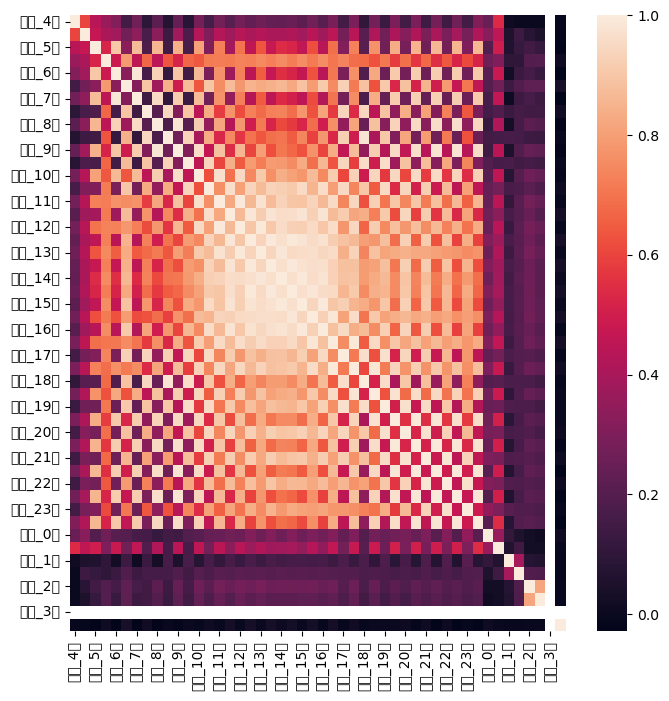

In [10]:
# 상관계수 체크
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr())
plt.show()

In [11]:
# 유동인구가 가장 많은 지하철역 top10 찾기
pd.pivot_table(data=data, index="지하철역", aggfunc="sum").sum(axis=1).sort_values(ascending=False)[:10]

지하철역
잠실(송파구청)    4742529
강남          4475269
서울역         4225238
고속터미널       4095429
홍대입구        3890159
선릉          3573716
사당          3507790
신림          3403013
가산디지털단지     3315718
구로디지털단지     3177940
dtype: int64

,4시,5시,6시,7시,8시,9시,10시,11시,12시,13시,...,18시,19시,20시,21시,22시,23시,0시,1시,2시,3시
1,641,16043,52831,129673,258855,180429,116889,114799,132040,130950,...,280996,145626,99626,100118,68299,29635,1358,4,4,0
2,142,3477,7461,13687,29705,24612,27010,36769,45775,55661,...,26685,13770,9382,8577,7657,4029,2025,2,0,0
3,30,6865,22765,64025,181992,91697,44902,50500,48037,48464,...,163011,60360,47486,45182,29950,9796,374,0,0,0
4,119,6599,23559,95499,235092,142653,68693,72258,69999,75803,...,241305,101722,77085,83334,64715,26897,533,0,0,0
5,244,6313,15714,27224,74907,78373,73352,88433,97514,105256,...,129552,72289,48929,50699,41059,17144,1049,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3,2455,8550,24862,32800,21185,15640,14262,15574,15680,...,29086,22867,13948,11915,10449,6041,0,0,0,0
606,4,2391,6915,17935,24172,16709,12377,11526,12711,12747,...,23221,15950,9434,8210,6571,3150,1,0,0,0
607,1,1197,2210,7256,14205,10714,9780,9996,11473,12239,...,19986,12313,8713,8744,7198,3454,1,0,0,0
608,1,624,2196,4887,8665,5988,4283,4233,4468,4685,...,7563,3940,2976,2716,2156,1290,33,0,0,0


C:\Users\munin\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\munin\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\munin\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\munin\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\munin\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\munin\anaconda\lib\sit

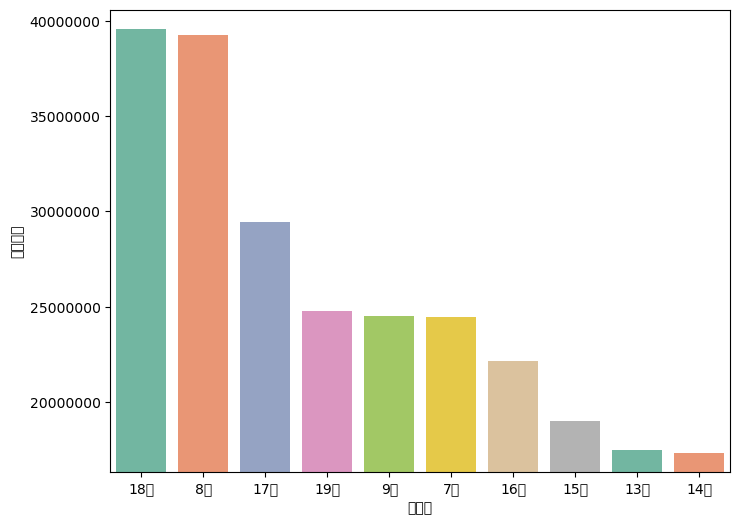

In [12]:
# 유동인구가 가장 많은 시간대 top10 찾기
#pd.pivot_table(data=data, index=data.columns[2:], aggfunc="sum")
# 승&하차 시간 합치기
X = pd.DataFrame()
for i in range(0, len(data.columns[2:]), 2): # 2개의 column씩 사용
  col_names = data.columns[2:][i].split("_")[1]
  col_values = data.iloc[:, i+2] + data.iloc[:, i+3]
  X[col_names] = col_values

display(X)
_temp = X.sum()[2:].sort_values(ascending=False)[:10]
temp_df = pd.DataFrame({"시간대":_temp.index, "유동인구":_temp.values})
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=temp_df, x="시간대", y="유동인구", palette="Set2")
ax.yaxis.get_major_formatter().set_scientific(False) # scale 변경
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.ylim(_temp.min()-1000000, _temp.max()+1000000)
plt.show()

### 3. 전처리

#### 결측치 처리

In [13]:
# 결측치가 있는 column
# 없음

### Feature scaling

- StandardScaler를 사용합니다.

In [14]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X

array([[ 0.57771514,  1.6230354 ,  2.76936268, ...,  3.73128214,
        14.09401067, -0.04055536],
       [-0.10221388, -0.40569496, -0.66807718, ...,  1.72832857,
        -0.13433993, -0.04055536],
       [-0.2548232 ,  0.14128407,  0.49142424, ..., -0.274625  ,
        -0.13433993, -0.04055536],
       ...,
       [-0.29433811, -0.77379183, -1.06591709, ..., -0.274625  ,
        -0.13433993, -0.04055536],
       [-0.29433811, -0.86630038, -1.0669778 , ..., -0.274625  ,
        -0.13433993, -0.04055536],
       [-0.19486954, -0.69355317, -1.00985129, ..., -0.274625  ,
        -0.13433993, -0.04055536]])

#### feature extraction

- 차원의 저주를 해결하거나, 데이터의 feature 조합을 이용하는 새로운 feature를 생성할 때, PCA를 사용합니다.

- 분석에 사용할 feature를 선택하는 과정도 포함합니다.

In [15]:
feature_reducing = False

In [16]:
# PCA 적용
from sklearn.decomposition import PCA

if feature_reducing:
    pca = PCA(n_components=0.9) # PCA(n_components=6)
    pca_data = pca.fit_transform(X)

### 4. 학습하기

- 데이터가 많다면 KMeans나 MiniBatchKMeans를 추천합니다.

- 데이터가 적은데 성능을 높이고 싶다면 SpectralClustering을 추천합니다.

- 데이터가 적은데, 클러스터 개수를 적절하게 고르지 못하겠다면 AgglomerativeClustering이나 DBSCAN을 추천합니다.


**[K-Means]**

- Elbow method를 이용하여 최적의 K값을 찾아보세요.


- sparse한 특징을 가지는 데이터를 클러스터링 하기 위해서는 어떤 기법을 사용해야 할까요?


- 클러스터링 결과를 시각화해보고, 실루엣 지수도 계산해봅시다.



**[Hierarchical Clustering]**

- 클러스터 개수를 4로 지정하고, linkage와 affinity를 바꿔가면서 실험해보세요.


- 어떤 linkage와 affinity를 쓸지 고민하려면, 어떤 방법을 사용해보면 좋을까요?


- dendrogram을 그려보세요. 결과가 잘 나왔나요?



**[DBSCAN]**

- MinPts와 Eps를 잘 조절해보세요. 밀도를 알맞게 조절하는게 제일 중요합니다.


- Outlier로 나온 데이터들은 어떻게 하는 것이 좋을까요?



**[Spectral Clustering]**

- 클러스터 개수를 K-means와 같게 지정하고, K-means와 성능을 비교해보세요.


- n_components는 몇 차원 공간으로 embedding할지를 정합니다. 5, 10, 20을 테스트해보세요. (무조건 이게 좋다는건 아닙니다.)


In [17]:
# 사용할 클러스터링 모델을 불러와서 학습시켜 봅니다.
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

import os, random
from pprint import pprint

# random seed 고정 
def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)

SEED = 0xC0FFEE
set_seeds(SEED)

clustering_method = "km" # "km" / "hac" / "dbscan" / "sc"

if clustering_method == "km":
  scores = []

  for n_clusters in range(2, 21):
    model = KMeans(n_clusters=n_clusters)
    pred = model.fit_predict(X)
    scores.append(silhouette_score(X, pred))

  scores = np.array(scores)
  print(f"Best score with K-means at {scores.argmax()+2} clusters, {scores.max():.4f} score.")

elif clustering_method == "hac":
  scores = {}
  for linkage in ["single", "average", "complete"]:
    temp_dict = {}
    for affinity in ["euclidean", "cosine", "manhattan"]:
      model = AgglomerativeClustering(n_clusters=4, affinity=affinity, linkage=linkage)
      pred = model.fit_predict(X)
      score = davies_bouldin_score(X, pred)
      temp_dict[affinity] = score
    scores[linkage] = temp_dict
  pprint(scores)

elif clustering_method == "dbscan":
  scores = []
  for minPts in [5, 10, 20]:
    for eps in [1, 2, 5, 10]:
      model = DBSCAN(metric="euclidean", min_samples=minPts, eps=eps, n_jobs=-1)
      pred = model.fit_predict(X)
      score = davies_bouldin_score(X, pred)
      scores.append(score)
  scores = np.array(scores)

  print(f"Best score with DBSCAN: {scores.max():.4f}")

elif clustering_method == "sc":
  scores = []
  for K in [5, 10, 20]:
    model = SpectralClustering(n_clusters=2, n_components=K)
    score = silhouette_score(X, model.fit_predict(X))
    scores.append(score)
  scores = np.array(scores)

  print(f"Best score with Spectral Clustering: {scores.max():.4f}")

Best score with K-means at 2 clusters, 0.5907 score.


### 5. 정량 평가

- elbow method, perplexity, silhouette score 등 다양한 평가 지표를 찾아서 사용해보세요!

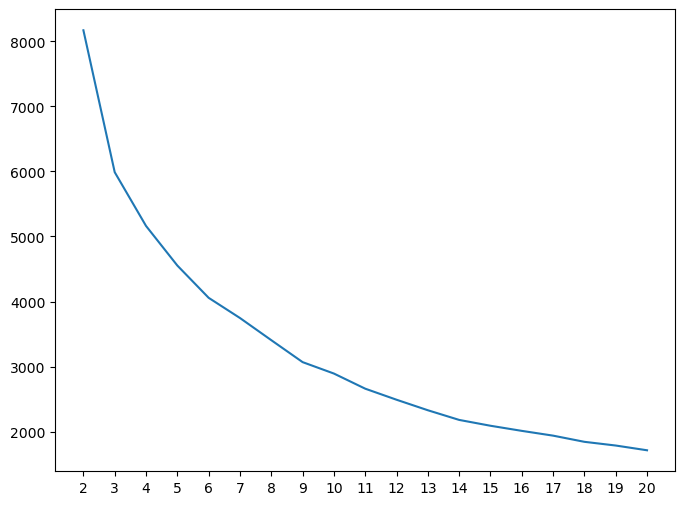

In [18]:
# optimal K는 어떻게 찾을까요?
sse = []

for n_clusters in range(2, 21):
  model = KMeans(n_clusters=n_clusters)
  pred = model.fit_predict(X)
  sse.append(model.inertia_)

plt.figure(figsize=(8, 6))
sns.lineplot(x=range(2, 21), y=sse)
plt.xticks(range(2, 21))
plt.show()

### 6. 정성 평가

- 결과를 해석하는 것이 unsupervised learning에서 굉장히 중요합니다.

- 클러스터링 결과를 시각화해보세요. (tSNE)

- 만들어진 클러스터 별 요약 정보를 확인해보세요.

- 우리의 분석 결과가 reasonable한가요?

C:\Users\munin\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\munin\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


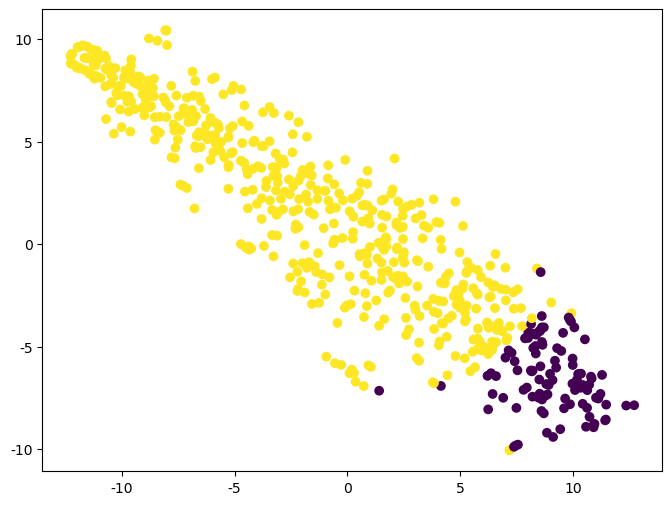

In [19]:
# 시각화
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=100)
model = KMeans(n_clusters=2)
pred = model.fit_predict(X)
tsne_data = tsne.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(x=tsne_data[:, 0], y=tsne_data[:, 1], c=pred)
plt.show()